In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat as loadmat
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

# Suppress warnings`
warnings.filterwarnings("ignore")

In [480]:
import imp

In [482]:
imp.reload(xy)

<module 'xy' from 'E:\\PyProject\\factors\\EP\\xy.py'>

In [2]:
import xy

# $因子描述：VolShadow$

***量比影线***  


In [520]:
Index_id = '1000'
index_ret = xy.Index_rets.loc[Index_id,:]

def cal_upshadow(Index_id):
    index_ret = xy.Index_rets.loc[Index_id,:]
    upShadow = pd.Series(np.nan,index = index_ret.index)
    upShadow.loc[index_ret[index_ret>0].index] = (xy.index_high.loc[Index_id,:] - xy.cl.loc[Index_id,:])
    upShadow.loc[index_ret[index_ret<=0].index] = (xy.index_high.loc[Index_id,:] - xy.op.loc[Index_id,:])
    
    return upShadow

def cal_downshadow(Index_id):
    index_ret = xy.Index_rets.loc[Index_id,:]
    downShadow = pd.Series(np.nan,index = index_ret.index)
    downShadow.loc[index_ret[index_ret>0].index] = (-xy.index_low.loc[Index_id,:] + xy.op.loc[Index_id,:])
    downShadow.loc[index_ret[index_ret<=0].index] = (-xy.index_low.loc[Index_id,:] + xy.cl.loc[Index_id,:])
    
    return downShadow

UpShadow_idx = pd.concat([
    cal_upshadow('50').rename('50'),
    cal_upshadow('300').rename('300'),
    cal_upshadow('500').rename('500'),
    cal_upshadow('1000').rename('1000')
],axis=1).rolling(1).mean().shift(1)

DownShadow_idx = pd.concat([
    cal_downshadow('50').rename('50'),
    cal_downshadow('300').rename('300'),
    cal_downshadow('500').rename('500'),
    cal_downshadow('1000').rename('1000')
],axis=1).rolling(1).mean().shift(1)

VMA5_VMA20 = (xy.index_volume.loc[:,:].T.rolling(5).mean()- xy.index_volume.loc[:,:].T.rolling(20).mean())/xy.index_volume.loc[:,:].T.rolling(20).mean()
VMA1_VMA5 = (xy.index_volume.loc[:,:].T.rolling(1).mean()- xy.index_volume.loc[:,:].T.rolling(5).mean())/xy.index_volume.loc[:,:].T.rolling(5).mean()

VMA_rate = (VMA1_VMA5 - VMA5_VMA20)/VMA5_VMA20

TVMA5_TVMA20 = (xy.index_tov.loc[:,:].T.rolling(5).mean()- xy.index_tov.loc[:,:].T.rolling(20).mean())/xy.index_tov.loc[:,:].T.rolling(20).mean()
TVMA1_TVMA5 = (xy.index_tov.loc[:,:].T.rolling(1).mean()- xy.index_tov.loc[:,:].T.rolling(5).mean())/xy.index_tov.loc[:,:].T.rolling(5).mean()

com_sig = (xy._Standlize(TVMA1_TVMA5)+xy._Standlize(VMA1_VMA5)+xy._Standlize(VMA5_VMA20)+xy._Standlize(TVMA5_TVMA20)).loc[:,'1000'].shift(1)

<Axes: >

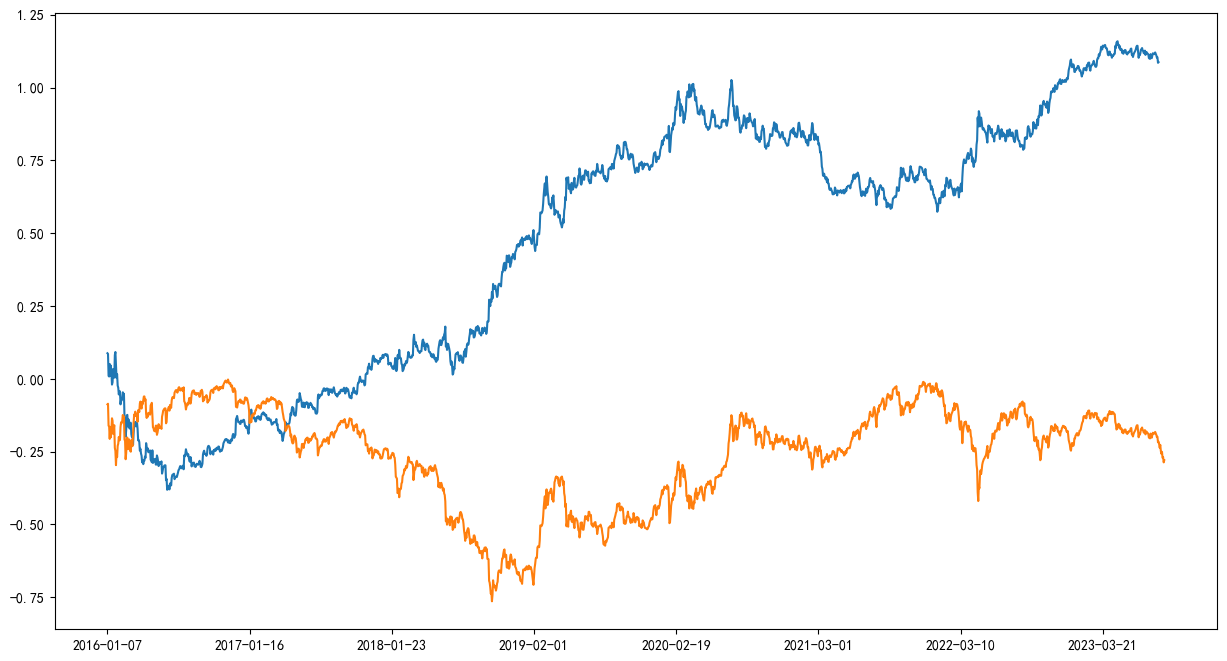

In [16]:
(com_sig.map(lambda x: 1 if x>0 else (-1 if x<-0 else 1))*xy.Index_rets.loc['1000',:]).dropna().loc['2016-01-07':].cumsum().plot()
xy.Index_rets.loc['1000','2016-01-07':].dropna().cumsum().plot(figsize=(15,8))

In [1503]:
(xy._Standlize(TVMA1_TVMA5)+xy._Standlize(VMA1_VMA5)+xy._Standlize(VMA5_VMA20)+xy._Standlize(TVMA5_TVMA20)).dropna().T

,2014-11-13,2014-11-14,2014-11-17,2014-11-18,2014-11-19,2014-11-20,2014-11-21,2014-11-24,2014-11-25,2014-11-26,...,2023-04-24,2023-04-25,2023-04-26,2023-04-27,2023-04-28,2023-05-04,2023-05-05,2023-05-08,2023-05-09,2023-05-10
50,5.166802,2.864221,1.639298,-0.083559,-2.521498,-3.490750,-0.773235,6.386800,1.089627,3.167936,...,0.901400,1.331660,0.593307,0.274289,1.222633,3.866389,2.168587,5.203218,5.542331,2.957072
300,3.792110,0.811893,-0.158811,-1.867524,-3.457599,-4.778636,-1.363881,6.502193,1.835834,2.433646,...,0.583227,0.727266,-0.016050,-0.666919,0.903522,3.522577,2.134652,4.596291,5.277978,1.667827
500,0.719350,-2.435119,-2.076178,-2.855365,-2.008522,-3.417009,-0.958072,6.033091,3.269032,3.191621,...,0.005564,1.174974,0.241822,-0.572536,1.350796,3.684506,1.679481,3.263176,4.332180,0.847254
1000,-0.236826,-4.045766,-3.197126,-3.135699,-1.477274,-2.642228,-1.407460,3.125901,3.371284,4.181863,...,-0.401665,1.401904,0.501775,-0.403293,0.650643,1.454525,0.197505,1.663383,2.503233,-0.953293


In [800]:
def w_cl_op(n):
    return ((((xy.cl.T.rolling(n).mean().T)-(xy.op).T.rolling(n).mean().T))*(((xy.index_high)-(xy.index_low))).T.rolling(1).mean().T*(xy.index_volume)).T[['50', '300', '500', '1000']].rolling(1).mean().shift().dropna().T.loc[['50', '300', '500', '1000'],'2016-01-04':]

In [874]:
coms4 = w_cl_op(1) + w_cl_op(3) 
coms5 = w_cl_op(2) + w_cl_op(4) 
coms6 = w_cl_op(3) + w_cl_op(5) 
coms7 = w_cl_op(4) + w_cl_op(6) 
coms8 = w_cl_op(5) + w_cl_op(7) 
coms_all = coms4 + coms5 + coms6 + coms7# + coms8

0.09885961710584105
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

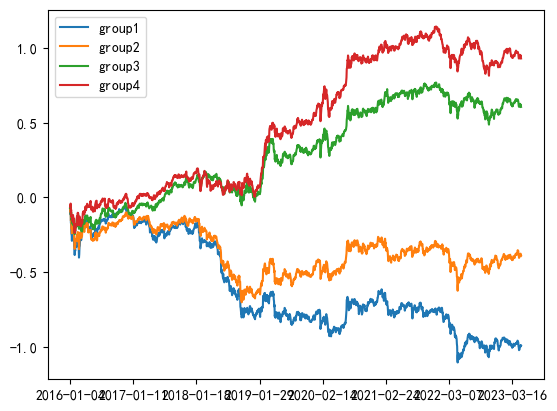

In [875]:
# 分组收益率
xy.cal_rate_group(
   # tov_std[(tov_std.rank()>3900)|((tov_std.rank()<1100))],
    # (((UpShadow_idx-DownShadow_idx)).dropna()).T.loc[['50', '300', '500', '1000'],'2016-01-04':],
    coms_all.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],:],
    # (((1*xy.cl.T.rolling(2).mean().T)-(xy.op).T.rolling(2).mean().T)*((xy.index_high)-(xy.index_low))*(xy.index_volume)).T[['50', '300', '500', '1000']].rolling(1).mean().shift().dropna().T.loc[['50', '300', '500', '1000'],'2016-01-04':],
    # (xy._Standlize(TVMA1_TVMA5)+xy._Standlize(VMA1_VMA5)+xy._Standlize(VMA5_VMA20)+xy._Standlize(TVMA5_TVMA20)).dropna().T.shift(1,axis=1),
    # (tov20-tov20.mean())/tov20.std() ,
    # tov_std.loc[tov_std.index.isin(xy.weights300.index | xy.weights50.index | xy.weights500.index | xy.weights1000.index)],
    xy.Index_rets,
    group_num=4,
    masks=1
).cumsum().plot()

2842.0
yoy: 0.26307587451746367 
 mdd: -0.20899753923556608 
 sharpe: 1.5022281811236484 
 rankIC: 0.06838565022421525 
 rankIR: 0.0886334476472738 
 win%: 0.5397982062780269 
 gain_loss%: -1.106568829301274


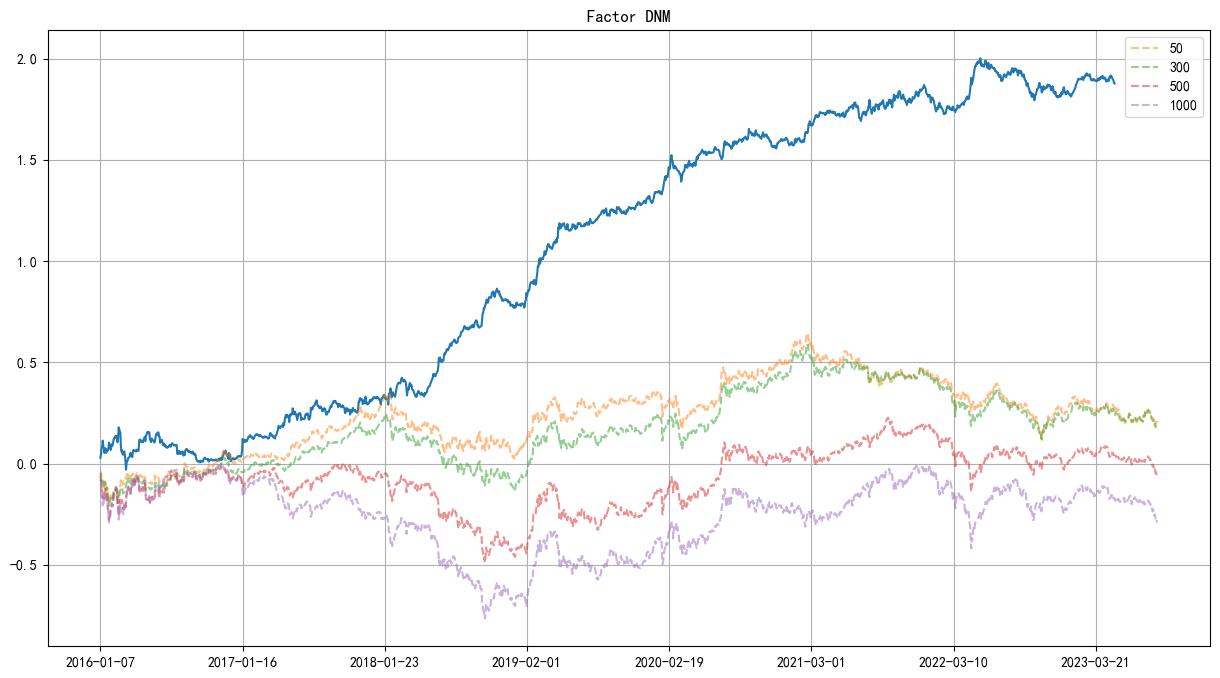

In [876]:
# 单因子强弱
DNM_select2, DNM_rets2 = xy.single_Factor_backtest(
    # sdsig.loc[['50', '300', '500', '1000'],'2016-01-07':'2023-12-07'],
    # ((2*xy.cl - xy.index_high - xy.index_low)/(xy.cl).shift(1,axis=1)).T[['50', '300', '500', '1000']].rolling(4).mean().shift().dropna().T.loc[['50', '1000'],'2016-01-04':],
    coms_all.T.rolling(1).mean().T.loc[:,'2016-01-07':'2023-12-07'],
    # (exR).T.rolling(13,min_periods=1).apply(lambda x:x.mean()).T.loc[['50', '300', '500', '1000'],:].shift(1,axis=1),
    # -(TVMA1_TVMA5+VMA5_VMA20).shift(1).rolling(20).std().T.loc[:,'2016-01-07':],
    
    # f.loc[['50', '300', '500', '1000'],'2016-02-28':].shift(1,axis=1),
    # f.T.shift(1).T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.Index_rets.loc[['50','300', '500', '1000'],'2016-01-07':'2023-12-07'],
    _side=1,
    fee=0.00,
    name='DNM'
)
# XXX.diff().sum().rolling(13).std().rolling(13).mean().plot()

In [1301]:
tov_std = (xy.turns.T.rolling(20).std()).shift().T
tov20  = (xy.turns.T.rolling(20).mean()).shift().T

tov_com = (tov20-tov20.mean())/tov20.std() + (tov_std-tov_std.mean())/tov_std.std()

In [1556]:
ret_std = (xy.rets.T.rolling(20).std()).shift().T
ret20  = (xy.rets.T.rolling(20).mean()).shift().T

ret_com = (ret20-ret20.mean())/ret20.std() + (ret_std-ret_std.mean())/ret_std.std()

In [475]:
sd_sig300 =(
    # (sig_up['300']- sig_down['300']).shift(4) + 
    # (sig_up['300']- sig_down['300']).shift(2)- 
    (sig_up['300']- sig_down['300']).shift(5)  -
    (sig_up['300']- sig_down['300']).shift(3) - 
    (sig_up['300']- sig_down['300']).shift()
).dropna()
sd_sig500 =(
    # (sig_up['500']- sig_down['500']).shift(4) + 
    # (sig_up['500']- sig_down['500']).shift(2)- 
    (sig_up['500']- sig_down['500']).shift(5) - 
    (sig_up['500']- sig_down['500']).shift(3) - 
    (sig_up['500']- sig_down['500']).shift()
).dropna()
sd_sig1000 =(
    # (sig_up['1000']- sig_down['1000']).shift(4) + 
    # (sig_up['1000']- sig_down['1000']).shift(2)- 
    (sig_up['1000']- sig_down['1000']).shift(5) - 
    (sig_up['1000']- sig_down['1000']).shift(3) - 
    (sig_up['1000']- sig_down['1000']).shift()
).dropna()
sd_sig50 =(
    # (sig_up['50']- sig_down['50']).shift(4) + 
    # (sig_up['50']- sig_down['50']).shift(2)- 
    (sig_up['50']- sig_down['50']).shift(5)  -
    (sig_up['50']- sig_down['50']).shift(3) - 
    (sig_up['50']- sig_down['50']).shift()
).dropna()
sdsig = pd.concat([
    sd_sig50,
    sd_sig300,
    sd_sig500,
    sd_sig1000,
],axis=1).T

-0.01773115580102085
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

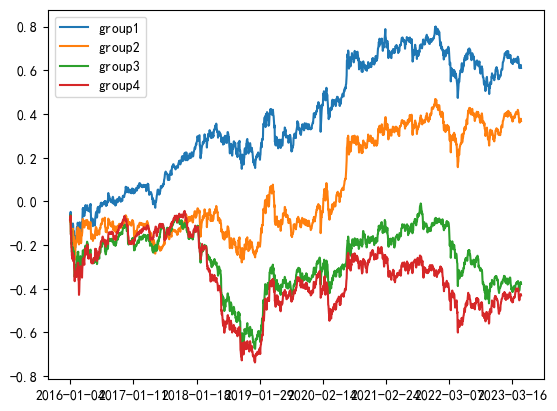

In [ ]:
# 分组收益率
xy.cal_rate_group(
    sdsig,
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-01-04':],
    group_num=4,
    masks=1
)[:].cumsum().plot()

1422.0
yoy: 0.19603371628877594 
 mdd: -0.2758477996477571 
 sharpe: 0.9823606670920711 
 rankIC: 0.05829596412556052 
 rankIR: 0.058378905706799024 
 win%: 0.5282596530498042 
 gain_loss%: -1.0502822530310796


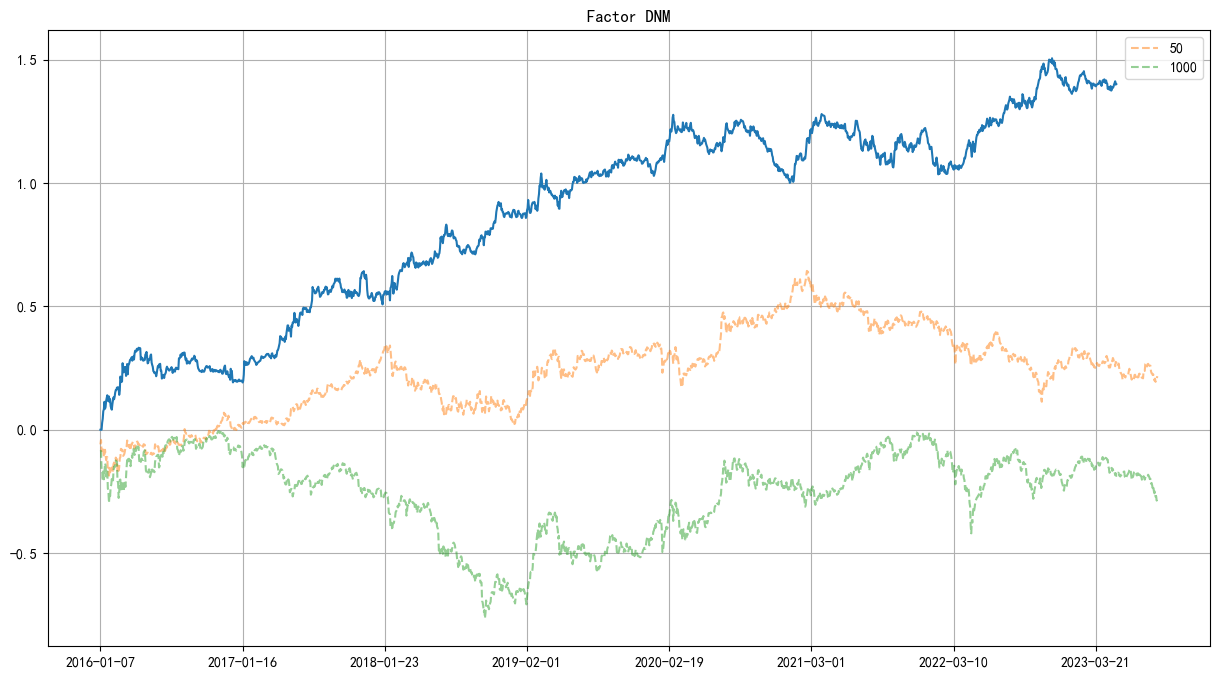

In [601]:
# 单因子强弱
DNM_select2, DNM_rets2 = xy.single_Factor_backtest(
    # sdsig.loc[['50', '300', '500', '1000'],'2016-01-07':'2023-12-07'],
    ((2*xy.cl - xy.index_high - xy.index_low)/(xy.cl).shift(1,axis=1)).T[['50', '300', '500', '1000']].rolling(4).mean().shift().dropna().T.loc[['50', '1000'],'2016-01-04':],
    # (exR).T.rolling(13,min_periods=1).apply(lambda x:x.mean()).T.loc[['50', '300', '500', '1000'],:].shift(1,axis=1),
    # -(TVMA1_TVMA5+VMA5_VMA20).shift(1).rolling(20).std().T.loc[:,'2016-01-07':],
    
    # f.loc[['50', '300', '500', '1000'],'2016-02-28':].shift(1,axis=1),
    # f.T.shift(1).T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.Index_rets.loc[['50',  '1000'],'2016-01-07':'2023-12-07'],
    _side=1,
    fee=0.00,
    name='DNM'
)
# XXX.diff().sum().rolling(13).std().rolling(13).mean().plot()

In [877]:
coms_all.loc[['50','300','500','1000'],'2016-01-04':].to_csv(r'E:\PyProject\factors\NewFactor\Intra_AmpMom.csv')